<h1 style="color: #ffffff; background-color: #333333; padding: 10px; border-radius: 10px; text-align: center; text-shadow: 3px 3px 9px #ccc; font-weight: bold;">
  Brain Tumor Detection using CNN
</h1>

![brain.jpg](https://projects.smartinternz.com/cdn/shop/files/5.Brain-tumour-1440x720.jpg?v=1702460420)

### **Introduction to the Brain Tumor Detection Model**

This script implements a Convolutional Neural Network (CNN) for brain tumor detection using images. The model is designed to classify images into two categories: "tumor" and "no tumor." The following steps outline the process:

1. **Data Preparation:**
   - **Image Loading:** Images are loaded from two directories—one for images with tumors and another for images without tumors. These images are resized to 128x128 pixels.
   - **Labeling:** Labels are assigned to the images, with `0` for no tumor and `1` for tumor.
   - **Data Splitting:** The dataset is split into training and testing sets using an 80-20 split.

2. **Data Augmentation:**
   - An `ImageDataGenerator` is used to apply various augmentations such as rotation, shifting, shearing, and zooming to improve the model's robustness.

3. **Model Architecture:**
   - A Sequential CNN model is defined with two convolutional layers followed by max pooling layers, a flattening layer, and two dense layers. The model uses ReLU activation for hidden layers and softmax for the output layer to classify images.

4. **Training:**
   - The model is compiled with categorical cross-entropy loss and the SGD optimizer. It is trained for 25 epochs with a batch size of 8.

5. **Evaluation:**
   - The model’s performance is evaluated using the classification report and confusion matrix. Accuracy is calculated to measure how well the model performs on the test data.

6. **Visualization:**
   - The loss curves for both training and validation data are plotted to visualize the model's training progress.

This script demonstrates the end-to-end pipeline for building, training, and evaluating a CNN model for brain tumor detection, leveraging data preprocessing, augmentation, and deep learning techniques.

# Import Necessary Libraries

In [56]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras import regularizers
import warnings

warnings.filterwarnings("ignore")

# Load the Images

In [57]:
no_tumor_dir = r'D:\Projects\Machine_Learning_Projects\05_BrainTumorDetection_API\BrainTumorDetection-API\Dataset\brain_tumor_dataset\no'
yes_tumor_dir = r'D:\Projects\Machine_Learning_Projects\05_BrainTumorDetection_API\BrainTumorDetection-API\Dataset\brain_tumor_dataset\yes'

In [58]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
    return images

In [59]:
no_tumor_images = load_images_from_folder(no_tumor_dir)
yes_tumor_images = load_images_from_folder(yes_tumor_dir)

In [60]:
no_tumor_labels = [0] * len(no_tumor_images)
yes_tumor_labels = [1] * len(yes_tumor_images)

In [61]:
X = np.array(no_tumor_images + yes_tumor_images)
y = np.array(no_tumor_labels + yes_tumor_labels)

# Inspect our Data

In [62]:
print("Initial shape or dimensions of X", str(X.shape))

print ("Number of samples in our data: " + str(len(X)))
print ("Number of labels in our data: " + str(len(y)))


print("\n")
print ("Dimensions of images:" + str(X[0].shape))

Initial shape or dimensions of X (253, 128, 128, 3)
Number of samples in our data: 253
Number of labels in our data: 253


Dimensions of images:(128, 128, 3)


<Figure size 640x480 with 0 Axes>

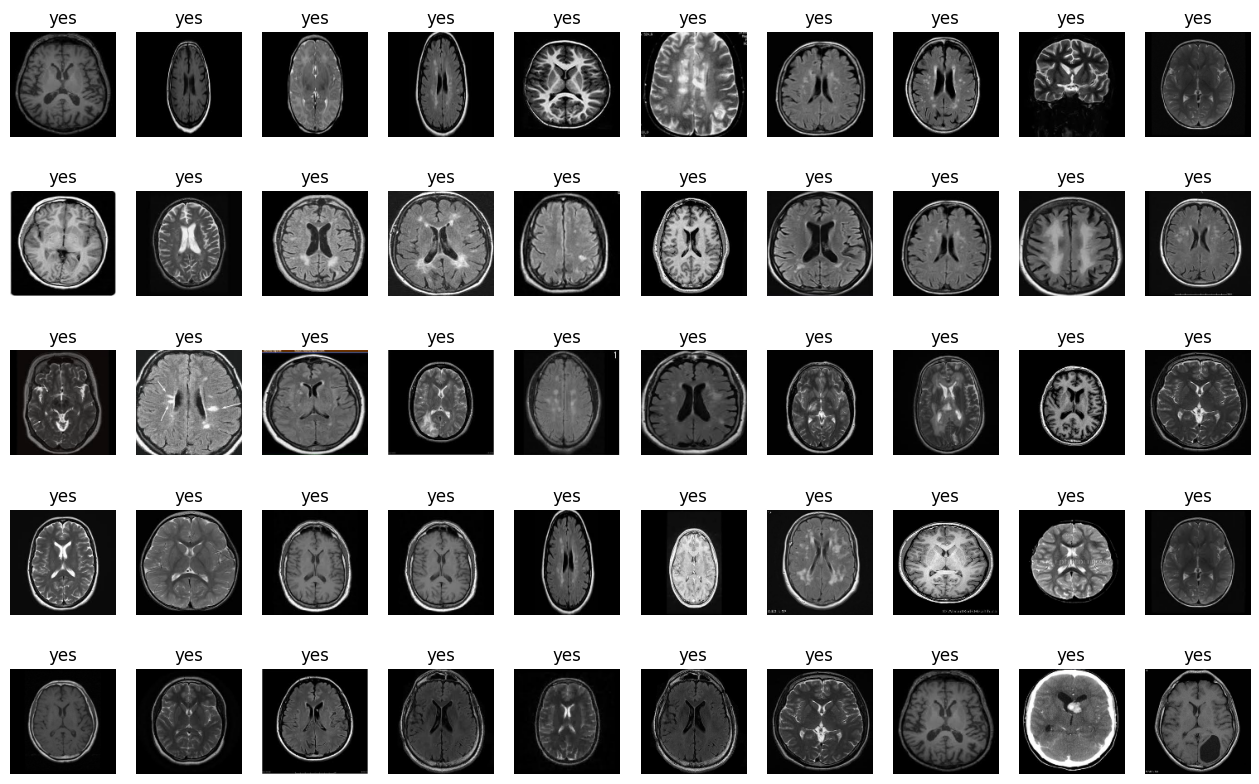

In [63]:
figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50 

classes = ["yes", "no"]

for index in range(1, num_of_images + 1):
    class_names = classes[y[index]]
    plt.subplot(5, 10, index).set_title(f'{class_names}')
    plt.axis('off')
    plt.imshow(X[index], cmap='gray_r')

# Data Preprocessing

In [64]:
X = X.astype('float32')

In [65]:
img_rows = X[0].shape[0]
img_cols = X[0].shape[1]

In [66]:
input_shape = (img_rows, img_cols, 3)

X /= 255.0
y = to_categorical(y, num_classes=2)

# Train & Test Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [68]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Model Building

### **Model Architecture**
   - **Sequential Model:** A CNN is created with the following layers:
     1. **Conv2D (32 filters, 3x3):** Convolution layer with 32 filters of size 3x3, ReLU activation.
     2. **MaxPooling2D (2x2):** Downsamples the input by a factor of 2.
     3. **Conv2D (64 filters, 3x3):** Another convolution layer with 64 filters.
     4. **MaxPooling2D (2x2):** Downsamples the input again.
     5. **Flatten:** Converts the 2D output of the previous layer into a 1D vector.
     6. **Dense (128 units):** Fully connected layer with 128 neurons and ReLU activation.
     7. **Dense (2 units):** Output layer with softmax activation for binary classification (tumor or no tumor).

   - **Model Compilation:** The model is compiled with categorical cross-entropy as the loss function and SGD (Stochastic Gradient Descent) as the optimizer.

In [69]:
L2 = 0.001

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [70]:
history = model.fit(X_train, y_train, batch_size = 8,
                              epochs = 25,
                              validation_data = (X_test, y_test),
                              verbose = 1,)

Epoch 1/25
26/26 [==============================] - 8s 267ms/step - loss: 0.6242 - accuracy: 0.6733 - val_loss: 0.6072 - val_accuracy: 0.7059
Epoch 2/25
26/26 [==============================] - 7s 266ms/step - loss: 0.5456 - accuracy: 0.7525 - val_loss: 0.5622 - val_accuracy: 0.6667
Epoch 3/25
26/26 [==============================] - 6s 225ms/step - loss: 0.5091 - accuracy: 0.8020 - val_loss: 0.4836 - val_accuracy: 0.8824
Epoch 4/25
26/26 [==============================] - 6s 241ms/step - loss: 0.4880 - accuracy: 0.8020 - val_loss: 0.6478 - val_accuracy: 0.5294
Epoch 5/25
26/26 [==============================] - 5s 203ms/step - loss: 0.4956 - accuracy: 0.7921 - val_loss: 0.3801 - val_accuracy: 0.8235
Epoch 6/25
26/26 [==============================] - 5s 202ms/step - loss: 0.4180 - accuracy: 0.8069 - val_loss: 0.5558 - val_accuracy: 0.7255
Epoch 7/25
26/26 [==============================] - 6s 222ms/step - loss: 0.4063 - accuracy: 0.8317 - val_loss: 0.3339 - val_accuracy: 0.9216
Epoch 

# Plotting Losses

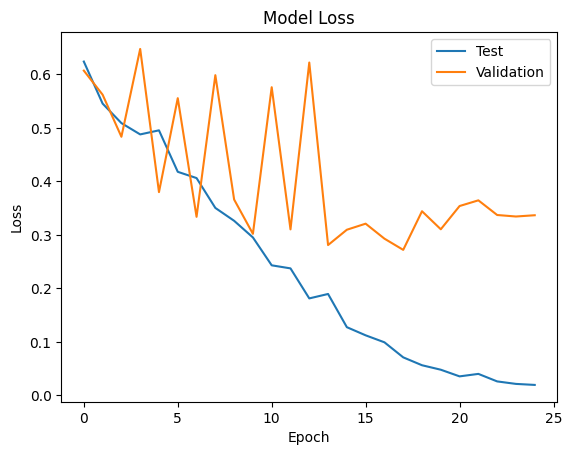

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Model Evaluation

In [72]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

2/2 [==============================] - 0s 85ms/step


In [73]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.90      0.87      0.89        31

    accuracy                           0.86        51
   macro avg       0.85      0.86      0.86        51
weighted avg       0.86      0.86      0.86        51



<AxesSubplot: >

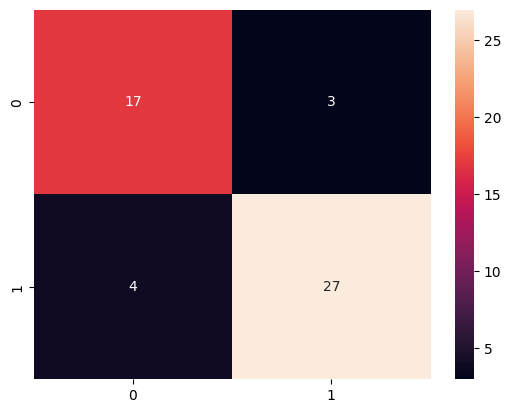

In [74]:
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True)

In [75]:
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Output the accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 86.27%


# Check the Model

In [76]:
# Prediction function
def predict_tumor(model, image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Resize the image to the input shape expected by the model
    img = cv2.resize(img, (128, 128))
    # Convert the image to array and normalize it
    img = img.astype('float32') / 255.0
    # Reshape the image to add an extra dimension for batch size
    img = np.reshape(img, (1, 128, 128, 3))
    # Make the prediction
    prediction = model.predict(img)
    # Get the class label
    class_index = np.argmax(prediction)
    class_labels = ["No Tumor", "Tumor"]
    print(f"Prediction: {class_labels[class_index]} ({prediction[0][class_index] * 100:.2f}%)")

# Example usage
image_path = r'Test Images\Y01.jpg'  # Update this with the path to the image you want to predict
predict_tumor(model, image_path)

1/1 [==============================] - 0s 31ms/step
Prediction: Tumor (99.98%)


# Save the entire model to a HDF5 file

In [77]:
# model.save('brain_tumor_cnn_model.h5')

# Summary of the Model

The model is a Convolutional Neural Network (CNN) designed for binary classification of brain tumor images. It uses two convolutional layers with max pooling, followed by dense layers for final classification. The model is trained using the SGD optimizer and evaluated using accuracy, confusion matrix, and classification report. Data augmentation techniques are applied to improve generalization, and the model achieves an accuracy of `92.16%` on the test set.